In [1]:
import sys
import numpy as np
# np.set_printoptions(threshold = sys.maxsize)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
### read in data
dataset= pd.read_csv('Documents/DS learning/regression/insurance.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Wrangling

False

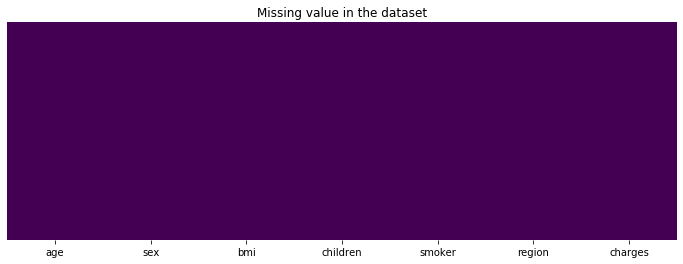

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')
dataset.isna().any().any()

In [9]:
from sklearn.preprocessing import LabelEncoder

#sex
le=LabelEncoder()
dataset.sex=le.fit_transform(dataset.sex)

#smoker
dataset.smoker=le.fit_transform(dataset.smoker)

#region
dataset_region=pd.get_dummies(dataset.region)

dataset=pd.concat([dataset,dataset_region],axis=1)
dataset=dataset.drop(['region'],axis=1)


dataset.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


visualization

In [10]:
dataset.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [11]:
dataset.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

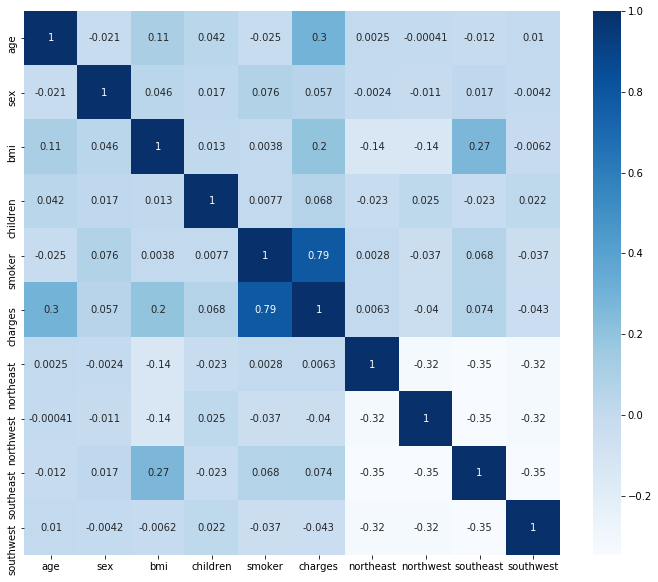

In [12]:
f,ax=plt.subplots(figsize=(12,10))
corr=dataset.corr()
sns.heatmap(corr, cmap = 'Blues', annot= True);

Smokers appear to have a higher correlation to charges than other variables

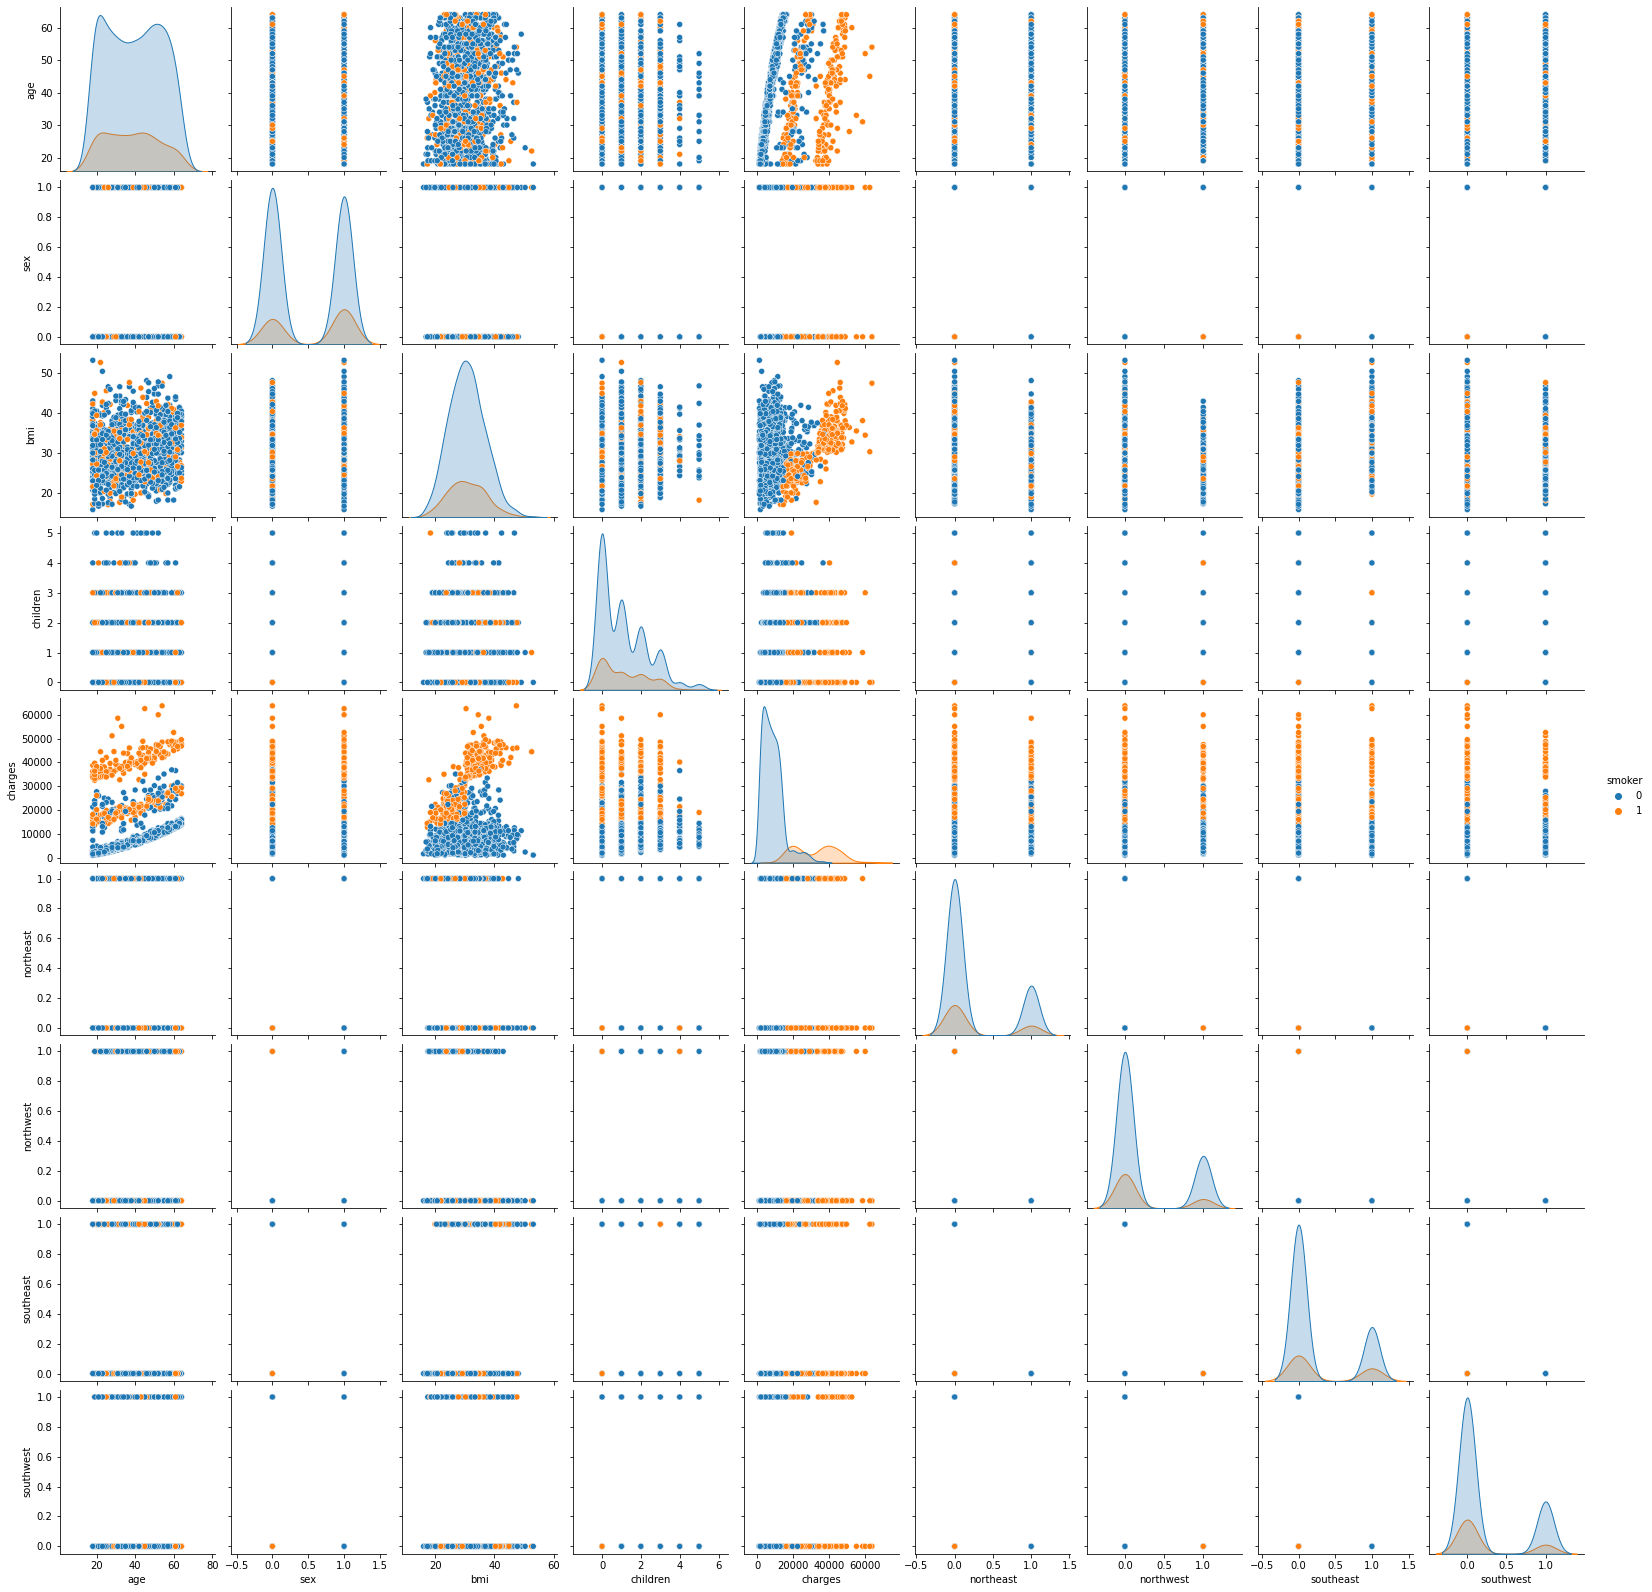

In [11]:
sns.pairplot(dataset, hue = 'smoker')

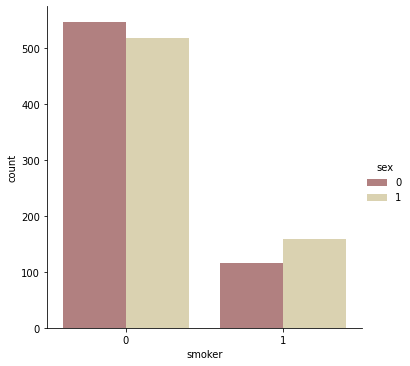

In [12]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=dataset)

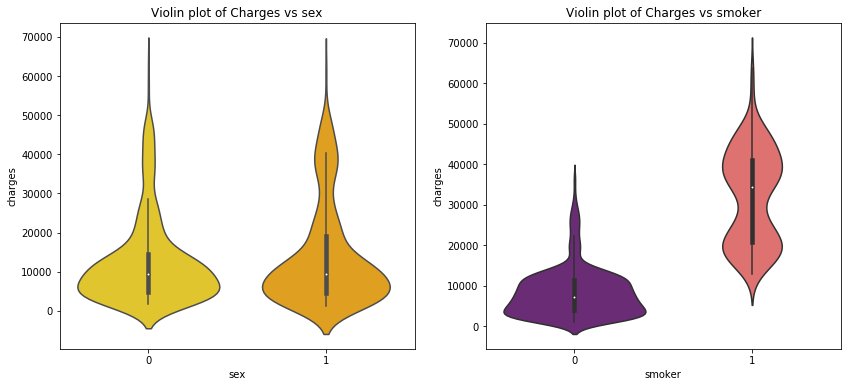

In [13]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=dataset,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=dataset,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

From the left plot, we can see that the insurance charge for male and female is virtually in the same range. In the right plot, we can visualize the insurance charges for smokers are much steeper than non-smokers.

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

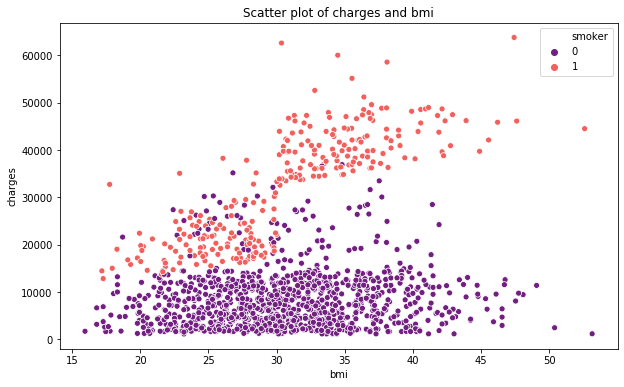

In [15]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=dataset,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

building model: Multilpe linear regression

In [16]:
X = dataset.drop(['charges'], axis = 1)
y = dataset.charges

In [17]:
X = X.to_numpy()

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#predicting test set results
y_pred = regressor.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7405989316927211

Polynomial reg

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred_poly = lin_reg_2.predict(poly_reg.transform(X_test))
r2_score(y_test,y_pred_poly)

0.7702566689960619

decision tree regression

In [25]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [26]:
y_pred_dt = dt_reg.predict(X_test)
r2_score(y_test,y_pred_dt)

0.7393635751806414

random forest regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [28]:
y_pred_rf = rf_reg.predict(X_test)
r2_score(y_test,y_pred_rf)

0.8342148541041546

The Random forest model appears to perform the best in predicting the insurance cost.